# 1. Importing the libraries

In [57]:
#linier algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC



# 2.Getting The Data

In [125]:
## load the datasets using pandas's read_csv method
train_df = pd.read_csv('Titanic.csv', index_col=0)


# concat these two datasets, this will come handy while processing the data
dataset =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
TestPassengerID = test_df['PassengerId']

# 3. Data Exploratory Analysis

In [126]:
# shape of the data set
train_df.shape

(891, 11)

In [127]:
# using info method we can get quick overview of the data sets
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [128]:
# Descriptive Statistics
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
# first 10 records
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [130]:
# check missing value 
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [131]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

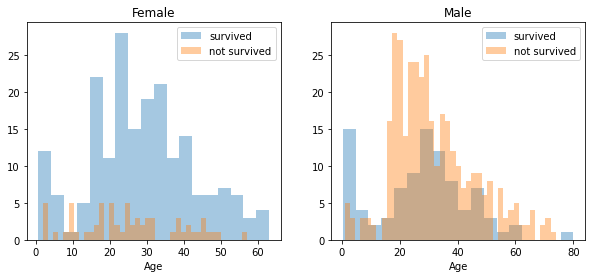

In [132]:
#Age and Sex

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


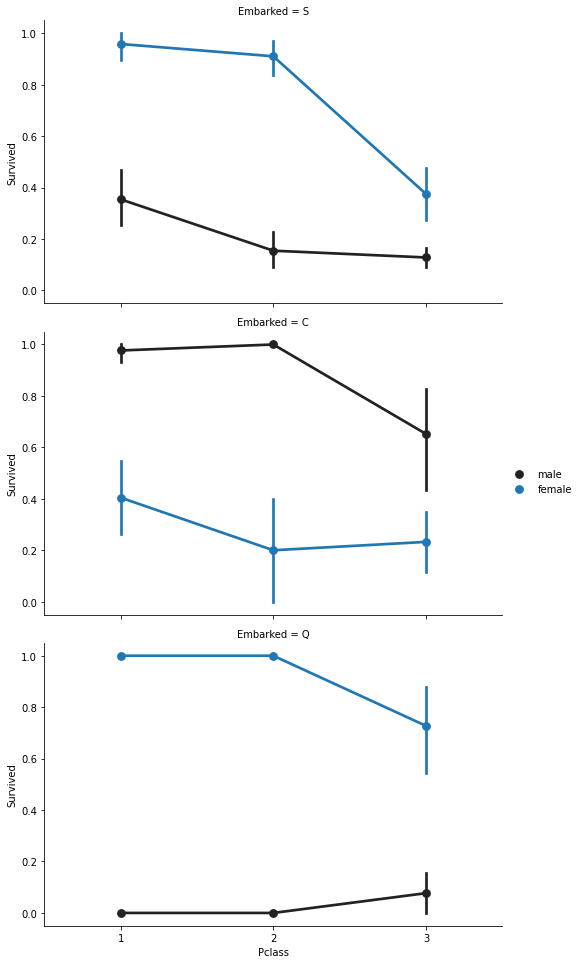

In [133]:
# Embark,Pclass,Sex

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

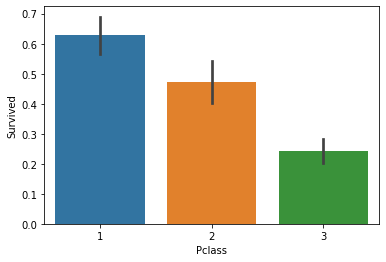

In [134]:
#Pclass

sns.barplot(x='Pclass', y='Survived', data=train_df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


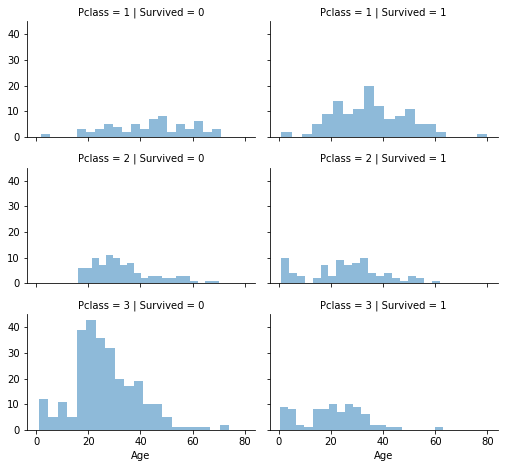

In [135]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 3. Data Cleansing

In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [137]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [138]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [139]:
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [140]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [141]:
val = train_df.Embarked.mode()[0]
train_df['Embarked'] = train_df.Embarked.fillna(val)

In [142]:
val = train_df.Embarked.mode()[0]
train_df['Embarked'] = train_df.Embarked.fillna(val)

val = train_df.Age.mean()
train_df['Age'] = train_df.Age.fillna(0)


In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [154]:
train_df.Cabin.value_counts()
train_df.drop('Cabin', axis=1, inplace=True)

In [144]:
train_df.drop('Name', axis=1, inplace=True)
train_df.Sex = train_df.Sex.map({'male':0, 'female':1})
train_df.drop("Ticket", axis=1, inplace=True)
train_df.Embarked = train_df.Embarked.map({'S':0, 'C':1, 'Q':2})
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 109.6+ KB


In [148]:
train_df_survived = pd.DataFrame(train_df.Survived.value_counts())
train_df_survived['status'] = ['dies','alive']
train_df_survived

,Survived,status
0,549,dies
1,342,alive


In [155]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


# 4. Building Machine Learning Model

In [157]:
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

x = train_df.loc[:, feature].values
y = train_df.loc[:,'Survived'].values

In [159]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_scal = SC.fit_transform(x)


In [162]:
#split training & testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.25,random_state=140)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [163]:
lr = LogisticRegression(max_iter = 100)
lr.fit(X_train,y_train)

LogisticRegression()

In [164]:
lr.predict_proba(X_test)

array([[0.81470661, 0.18529339],
       [0.85460197, 0.14539803],
       [0.78408044, 0.21591956],
       [0.97110127, 0.02889873],
       [0.85460197, 0.14539803],
       [0.80978264, 0.19021736],
       [0.88985876, 0.11014124],
       [0.91368903, 0.08631097],
       [0.24274648, 0.75725352],
       [0.80978264, 0.19021736],
       [0.02605605, 0.97394395],
       [0.93801448, 0.06198552],
       [0.93414123, 0.06585877],
       [0.89101568, 0.10898432],
       [0.89219798, 0.10780202],
       [0.7881939 , 0.2118061 ],
       [0.79162685, 0.20837315],
       [0.4843971 , 0.5156029 ],
       [0.85445208, 0.14554792],
       [0.83331551, 0.16668449],
       [0.29301722, 0.70698278],
       [0.85134902, 0.14865098],
       [0.47485668, 0.52514332],
       [0.894558  , 0.105442  ],
       [0.8547193 , 0.1452807 ],
       [0.4981961 , 0.5018039 ],
       [0.37075649, 0.62924351],
       [0.90448158, 0.09551842],
       [0.94962258, 0.05037742],
       [0.70690356, 0.29309644],
       [0.

In [173]:
y_pred = lr.predict_proba(X_train)
y_pred = pd.DataFrame({'y_proba':lr.predict_proba(X_train)[:,1],'class_pred':lr.predict(X_train),'class_true':y_train})
bin=[0,0.25,0.5,0.75,1]
y_pred['group']=pd.cut(y_pred.y_proba,bins= bin)
temp1 = pd.pivot_table(y_pred,index='group',aggfunc='sum',values=['class_pred','class_true'])
temp1


,class_pred,class_true
group,,
"(0.0, 0.25]",0,50
"(0.25, 0.5]",0,28
"(0.5, 0.75]",110,64
"(0.75, 1.0]",119,111


In [174]:
## KNN
kn = KNeighborsClassifier(n_neighbors=15)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [175]:
y_pred = kn.predict_proba(X_train)
y_pred = pd.DataFrame({'y_proba':kn.predict_proba(X_train)[:,1],'class_pred':lr.predict(X_train),'class_true':y_train})
bin=[0,0.25,0.5,0.75,1]
y_pred['group']=pd.cut(y_pred.y_proba,bins= bin)
temp2 = pd.pivot_table(y_pred,index='group',aggfunc='sum',values=['class_pred','class_true'])
temp2

,class_pred,class_true
group,,
"(0.0, 0.25]",3,30
"(0.25, 0.5]",32,46
"(0.5, 0.75]",47,42
"(0.75, 1.0]",147,135
